# LDA

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
specs_on_folder = '/content/drive/MyDrive/With specs '
specs_off_folder = '/content/drive/MyDrive/Without specs '

In [5]:
os.listdir(specs_on_folder)

['IMG_20221003_120028.jpg',
 'IMG_20221003_120029.jpg',
 'IMG_20221003_120029__01.jpg',
 'IMG_20221003_120030.jpg']

In [6]:
os.listdir(specs_off_folder)

['IMG_20221003_120040.jpg',
 'IMG_20221003_120039__01.jpg',
 'IMG_20221003_120038.jpg',
 'IMG_20221003_120039.jpg',
 'IMG_20221003_120037.jpg']

In [7]:
def load_img(folder):
  images = []

  for i in os.listdir(folder):
    img = cv2.imread(os.path.join(folder, i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256, 256))

    images.append(img)
  
  return images


In [8]:
specs_on = load_img(specs_on_folder)
specs_off = load_img(specs_off_folder)

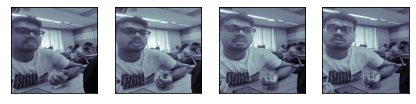

In [24]:
fig = plt.figure(figsize = (9, 15))
for i in range(4):
  ax = fig.add_subplot(4, 5, i+1, xticks = [], yticks = [])
  ax.imshow(specs_on[i], cmap = plt.cm.bone)

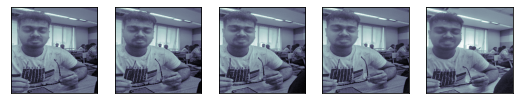

In [25]:
fig = plt.figure(figsize = (9, 15))
for i in range(5):
  ax = fig.add_subplot(4, 5, i+1, xticks = [], yticks = [])
  ax.imshow(specs_off[i], cmap = plt.cm.bone)

In [26]:
def get_array(folder):
  arrays = np.array(load_img(folder))
  arrays = np.reshape(arrays, (arrays.shape[0], arrays.shape[1]*arrays.shape[2]))
  return arrays

In [27]:
x1 = get_array(specs_on_folder)
x2 = get_array(specs_off_folder)

In [28]:
x = np.concatenate((x1, x2), axis = 0)
x.shape

(9, 65536)

In [31]:
y0 = np.zeros(4, dtype = bool)
y1 = np.ones(5, dtype = bool)

y = np.concatenate((y0, y1), axis = 0)

In [32]:
y = y.reshape((9, 1))
y.shape

(9, 1)

In [33]:
x = x.reshape((9, 256*256))
x = x.astype('float32') / 255
x.shape

(9, 65536)

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [35]:
lda = LDA(n_components = 1)
lda.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1)

In [36]:
z = lda.transform(x)
z

array([[-2.16839122],
       [-0.40765063],
       [ 0.40459247],
       [-0.70962282],
       [ 0.9727639 ],
       [ 1.7868054 ],
       [ 0.58964562],
       [ 0.31533587],
       [-0.78347859]])

In [37]:
y_pred = lda.predict(x)
y_pred

array([False, False,  True, False,  True,  True,  True,  True, False])

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
cm = confusion_matrix(y_pred, y)
cm

array([[3, 1],
       [1, 4]])

In [40]:
accuracy_score(y_pred, y)

0.7777777777777778

# ANN

In [42]:
from keras import models, layers

In [43]:
network = models.Sequential()

network.add(layers.Dense(512, activation = 'leaky_relu', input_shape = (256*256, )))
network.add(layers.Dense(128, activation = 'relu', input_shape = (256*256, )))
network.add(layers.Dense(1, activation = 'sigmoid', input_shape = (256*256, )))

In [44]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               33554944  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,620,737
Trainable params: 33,620,737
Non-trainable params: 0
_________________________________________________________________


In [45]:
network.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [46]:
x.shape, y.shape

((9, 65536), (9, 1))

In [47]:
network.fit(x, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6811 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 246ms/step - loss: 277.0317 - accuracy: 0.5556
Epoch 3/5
1/1 [==============================] - 0s 255ms/step - loss: 342.0698 - accuracy: 0.4444
Epoch 4/5
1/1 [==============================] - 0s 237ms/step - loss: 66.6489 - accuracy: 0.5556
Epoch 5/5
1/1 [==============================] - 0s 240ms/step - loss: 194.5582 - accuracy: 0.4444
